In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix

In [8]:
# Load the dataset
titanic_data = pd.read_csv("/content/drive/MyDrive/tested.csv")
titanic_data.shape
# Display the first few rows of the dataset
print(titanic_data.head())
titanic_data.info()

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

In [9]:
#check the number of missing values in each column
titanic_data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
413        False     False   False  False  False   True  False  False   False   
414        False     False   False  False  False  False  False  False   False   
415        False     False   False  False  False  False  False  False   False   
416        False     False   False  False  False   True  False  False   False   
417        False     False   False  False  False   True  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False   True     False  
2    False   True     False  
3    False   True     False  
4    False   True     False  
..     ...    ...       ...  
413  False   True     False  
414  False  False     False  
415  False   True     False  
416  False   True     False  
417  False   True     False  

[418 rows x 12 columns]>

In [10]:
#drop the cabin column from datafram
titanic_data=titanic_data.drop(columns='Cabin' , axis=1)
#replacing  the missing value in age column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
#finding mode value of Embarked column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [11]:
print(titanic_data['Embarked'].mode()[0])


S


In [12]:
#replacing the missing values in Embarked column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
print(titanic_data['Fare'].mode())
titanic_data['Fare'].fillna(titanic_data['Fare'].mode()[0], inplace=True)
#check the number of missing values of each column
titanic_data.isnull().sum()
#getting some statistical measures about the data
titanic_data.describe()

0    7.75
Name: Fare, dtype: float64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
#finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [14]:
#Data visualization
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

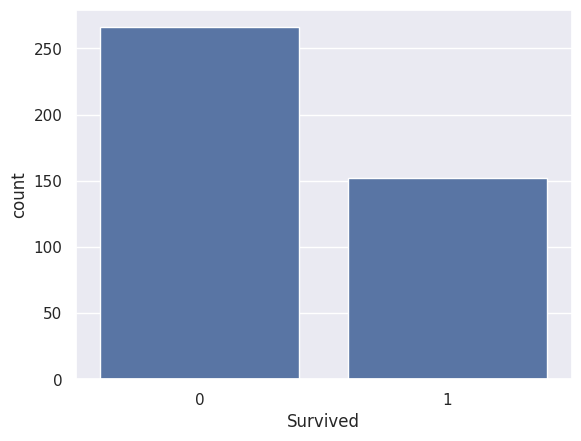

In [15]:
sns.countplot(x='Survived', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

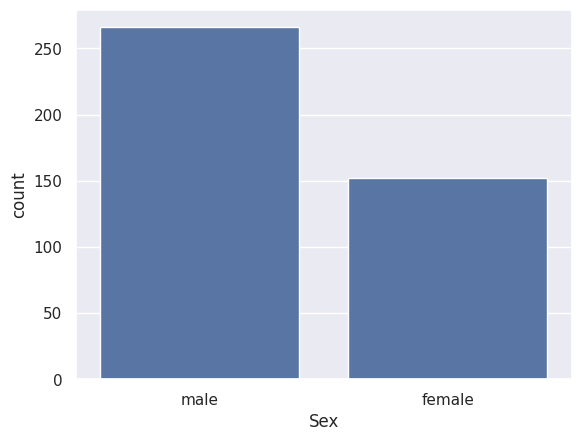

In [16]:
titanic_data['Sex'].value_counts()
sns.countplot(x='Sex', data= titanic_data)

In [17]:
titanic_data['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [18]:
#here map female and male data into binary form
titanic_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [19]:
X=titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=titanic_data['Survived']
print(X)
print(Y)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [21]:
# Instantiate the model
model=LogisticRegression()

# Training the model
model.fit(X, Y)
# Training set accuracy
X_train_prediction = model.predict(X)
print("Training set accuracy:", X_train_prediction)
training_data_accuracy=accuracy_score(Y,X_train_prediction)
print('Accuracy score of training data:',training_data_accuracy)

Training set accuracy: [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
Accuracy score of training data: 1.0


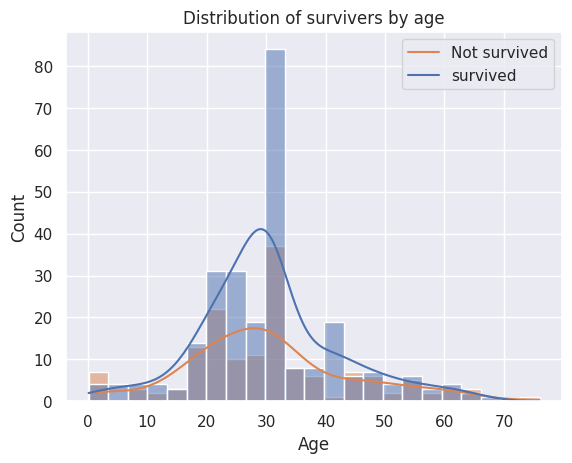

In [25]:
#Exploring the distribution by Age
sns.histplot(x='Age',hue='Survived',kde=True,data=titanic_data)
plt.title('Distribution of survivers by age')
plt.legend(['Not survived','survived'])
plt.show()